- 중심경향도/ 분산도
- 분포

### 1. 중심경향도와 분산도

- 자료의 중심을 나타내는 숫자, 자료 전체를 대표
- 평균, 중간값, 최빈값 등
- 개수: count
- 합계: sum
- 평균: mean
- 분산: var
- 표준편차: std
- 중간값: median
- 최솟값: min
- 최댓값: max
- 4분위값: quantile
- 누적 합계: cumsum
- 누적 곱: cumprod
- 통합: describe

- 평균(mean): 자료의 합을 자료의 갯수로 나눈 값

In [4]:
x = [100, 200, 400, 500,600,700,800, 900,1000]
import numpy
numpy.mean(x)

np.float64(577.7777777777778)

- 중위수, 중간값
- 중간값(median): 자료를 크기 순으로 정렬했을 때 정 가운데에 있는 값
- 자료의 상위 50%와 하위 50%를 가르는 지점

In [5]:
numpy.median(x)

np.float64(600.0)

- 최빈값(mode): 가장 빈번하게 관찰/측정되는 값

In [6]:
y = [100, 100, 100, 200, 400, 500,600,700,800, 900, 1000]
from scipy.stats import mode
mode(y)

ModeResult(mode=np.int64(100), count=np.int64(3))

- 판다스를 이용한 기초 통계 함수들

In [7]:
import  pandas as pd
 
event =[12,23,34,12,12,23,12,45,50,22,12,34]
months =[]
for m in range(1,13):
    months.append(m)
ev = pd.Series(event,index=months)
print("개수:",ev.count())
print("합계:",ev.sum())
print("평균:",ev.mean())
print("분산:",ev.var())
print("표준편차:",ev.std())
print("중간값:",ev.median())
print("최솟값:",ev.min())
print("최댓값:",ev.max())
print("10%:",ev.quantile(0.1))
print("50%:",ev.quantile(0.5))
print("70%:",ev.quantile(0.7))

개수: 12
합계: 291
평균: 24.25
분산: 185.6590909090909
표준편차: 13.625677631189243
중간값: 22.5
최솟값: 12
최댓값: 50
10%: 12.0
50%: 22.5
70%: 30.699999999999992


In [8]:
print(ev.describe())

count    12.000000
mean     24.250000
std      13.625678
min      12.000000
25%      12.000000
50%      22.500000
75%      34.000000
max      50.000000
dtype: float64


### 2. Distribution

- 정규분포(Normal Distribution), 표준정규분포(Standard Normal Distribution), Zero-Mean Gaussian 분포

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### 2.1 정규분포(Normal Distribution)

- 정규분포는 평균(𝜇)과 표준편차(𝜎)를 가지는 분포, 좌우대칭, 종모양

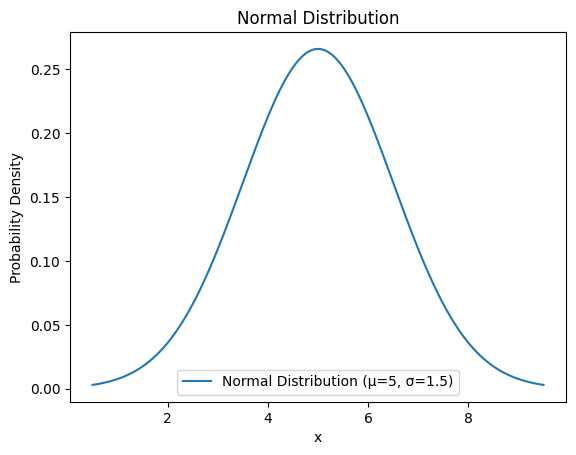

In [11]:
# 정규분포 파라미터: mu (μ) : 평균(mean), sigma (σ) : 표준편차(std), -> 중심은 5, 퍼짐 정도는 1.5인 정규분포
mu, sigma = 5, 1.5

# x 범위 설정: 평균을 중심으로 μ − 3σ  ~  μ + 3σ ,  총 1000개 점 생성--> 정규분포의 거의 모든 영역 
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# 시각화
plt.plot(x, y, label=f'Normal Distribution (μ={mu}, σ={sigma})')
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


#### 2.2 표준정규분포(Standard Normal Distribution)

- 표준정규분포는 평균이 0이고 표준편차가 1인 정규분포,좌우대칭 

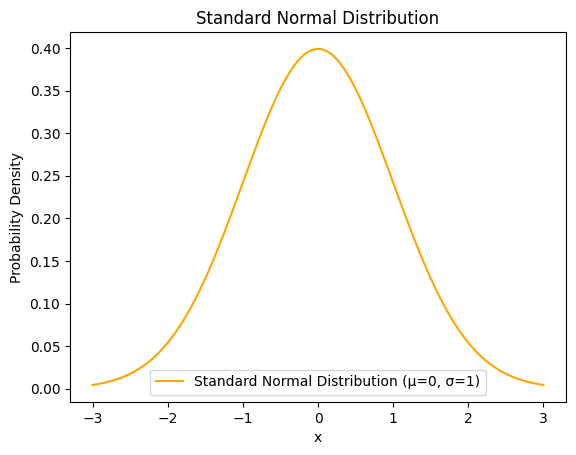

In [12]:
# 표준정규분포
mu_standard, sigma_standard = 0, 1

# x 범위 설정: -3부터 3까지, 1000개의 점 생성, --> 표준정규분포의 거의 전체 영역 포함
x_standard = np.linspace(-3, 3, 1000)
y_standard = stats.norm.pdf(x_standard, mu_standard, sigma_standard)

# 시각화
plt.plot(x_standard, y_standard, label='Standard Normal Distribution (μ=0, σ=1)', color='orange')
plt.title("Standard Normal Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


#### 2.3 Zero-Mean Gaussian 분포

- Zero-Mean Gaussian 분포는 평균이 0인 가우시안 분포로, 표준편차는 임의의 값을 가질 수 있습니다.
- 표준정규분포는 Zero-Mean Gaussian 분포의 특별한 경우입니다.

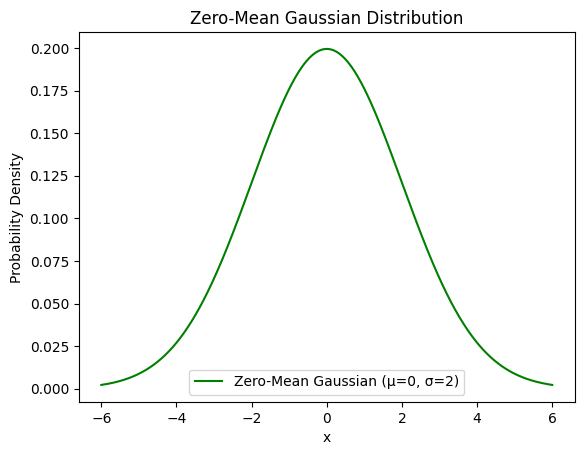

In [13]:
# Zero-Mean Gaussian Distribution 파라미터
sigma_zero_mean = 2  # 예시로 표준편차 2를 사용

# x 범위 설정
x_zero_mean = np.linspace(-3*sigma_zero_mean, 3*sigma_zero_mean, 1000)
y_zero_mean = stats.norm.pdf(x_zero_mean, 0, sigma_zero_mean)

# 시각화
plt.plot(x_zero_mean, y_zero_mean, label=f'Zero-Mean Gaussian (μ=0, σ={sigma_zero_mean})', color='green')
plt.title("Zero-Mean Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


### 3. 이산확률분포

- 이항분포,  --> n 시행을 늘리면 정규분포

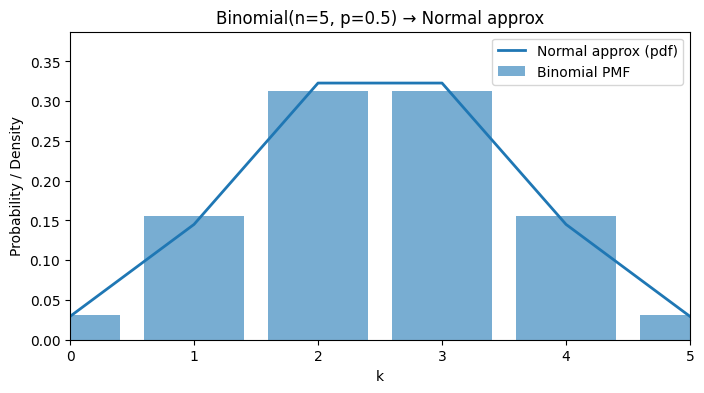

In [15]:
#시행 횟수 𝑛이 커질수록 어떻게 변하는지(정규분포로 수렴)를 애니메이션으로 보여주기 위한 준비 단계

# FuncAnimation : 프레임마다 그래프를 업데이트하는 애니메이션 생성기
# HTML : 주피터 노트북에서 애니메이션을 재생 가능하게 출력

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 파라미터 : p = 0.5의미- 이항분포의 성공 확률
p = 0.5
n_values = list(range(5, 201, 5))  # n을 5부터 200까지 5씩 증가 (원하면 조절)

fig, ax = plt.subplots(figsize=(8, 4))  # 그래프 캔버스 생성- 전체 그림(fig)과 좌표축(ax) 생성, 가로로 긴 그래프 형태

# 초기 n으로 x 범위 만들기(업데이트 때마다 n이 바뀌므로, 매 프레임마다 새로 설정할 것)
bars = None
normal_line, = ax.plot([], [], lw=2)  # 정규근사 라인

title = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center", va="bottom", fontsize=12)

def update(n):
    global bars

    ax.cla()  # 축을 통째로 지우고 다시 그림 (가장 단순/안정)
    x = np.arange(0, n + 1)

    # 이항분포 PMF
    pmf = stats.binom.pmf(x, n, p)

    # 정규근사: N(np, np(1-p))
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))

    # 연속정규를 이산 x 위에서 비교용으로 찍어보기
    # (연속성 보정 느낌을 내고 싶으면 x±0.5 구간 적분으로 바꿀 수도 있음)
    normal_approx = stats.norm.pdf(x, loc=mu, scale=sigma)

    # 시각화: pmf는 막대, 정규근사는 선
    ax.bar(x, pmf, alpha=0.6, label="Binomial PMF")

    ax.plot(x, normal_approx, lw=2, label="Normal approx (pdf)")

    ax.set_title(f"Binomial(n={n}, p={p}) → Normal approx")
    ax.set_xlabel("k")
    ax.set_ylabel("Probability / Density")
    ax.set_xlim(0, n)
    ax.set_ylim(0, max(pmf.max(), normal_approx.max()) * 1.2)
    ax.legend(loc="upper right")

    return ax

anim = FuncAnimation(fig, update, frames=n_values, interval=250, blit=False)

HTML(anim.to_jshtml())
